### TODO:
    - explore such redundancies in data/labels
    - do better EDA
    - rename some labels if need be
    - create network graph
    - create geographigcal viz (geopandas)
    - analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/cpj.csv')
data.head()

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n


In [4]:
sex = data.Sex
sex.dropna(inplace=True)
sex.groupby(sex).count()

Sex
Female      80
Male      1136
Name: Sex, dtype: int64

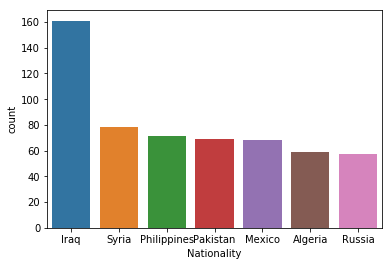

In [18]:
# countries = data.Nationality
# countries.dropna(inplace=True)
# counts = countries.groupby(countries).count()

# subset= counts[counts > 50].index
# print(list(subset))
# high_death_nat = countries[countries.isin(subset)]
sns.countplot(data = data, x = 'Nationality', order = data.Nationality.value_counts().iloc[:7].index)

In [42]:
not_freelance = data[~data['Organization'].isin(['Freelance', 'freelance','Freelancer'])].dropna()
group = not_freelance.groupby('Organization')['Organization']\
    .count().reset_index(name='count')\
    .sort_values(['count'], ascending=False)

group.head()
# sns.countplot(data = not_freelance, x = 'Organization', order = not_freelance.Organization.value_counts().iloc[:7].index)

,Organization,count
55,Algerian State Television,6
321,Ozgur Gundem,6
30,Al-Iraqiya,6
79,Baghdad TV,5
43,Al-Shaabiya,5


In [43]:
# TODO:
freelance = data[data['Organization'].isin(['Freelance', 'freelance','Freelancer'])].dropna()
group = freelance.groupby('Organization')['Organization']\
    .count().reset_index(name='count')\
    .sort_values(['count'], ascending=False)

group.head()

,Organization,count
0,Freelance,32
2,freelance,22
1,Freelancer,14
